# Phase 4: Visualizations & Business Insights

### 1. Setup & Data Loading

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [76]:
# Load data from all phases
train_df = pd.read_csv('../data/train.csv')
val_df = pd.read_csv('../data/val.csv')
test_df = pd.read_csv('../data/test.csv')

print("Data loaded successfully!")
print(f"Train: {train_df.shape}")
print(f"Validation: {val_df.shape}")
print(f"Test: {test_df.shape}")

# Check class distribution
print("\nClass distribution:")
print("Train:", (train_df['Sentiment'].value_counts(normalize=True) * 100).round(2).astype(str) + '%')
print("Val:", (val_df['Sentiment'].value_counts(normalize=True) * 100).round(2).astype(str) + '%')
print("Test:", (test_df['Sentiment'].value_counts(normalize=True) * 100).round(2).astype(str) + '%')

Data loaded successfully!
Train: (4089, 2)
Validation: (876, 2)
Test: (877, 2)

Class distribution:
Train: Sentiment
neutral     53.58%
positive    31.69%
negative    14.72%
Name: proportion, dtype: object
Val: Sentiment
neutral     53.54%
positive    31.74%
negative    14.73%
Name: proportion, dtype: object
Test: Sentiment
neutral     53.59%
positive     31.7%
negative    14.71%
Name: proportion, dtype: object


In [77]:
# Phase performance data
phase_results = {
    'Phase 1 (Baseline)': {
        'accuracy': 0.674,
        'f1_weighted': 0.674,
        'f1_macro': 0.674,
        'negative_f1': 0.07,
        'method': 'TF-IDF + Logistic Regression',
        'training_time': '2-5 minutes',
        'model_size': 'Small (TF-IDF vectors)',
        'complexity': 'Low'
    },
    'Phase 2 (Classic ML)': {
        'accuracy': 0.713,
        'f1_weighted': 0.713,
        'f1_macro': 0.713,
        'negative_f1': 0.07,
        'method': 'Feature Engineering + Stacking',
        'training_time': '10-15 minutes',
        'model_size': 'Medium (ensemble)',
        'complexity': 'Medium'
    },
    'Phase 3 (FinBERT)': {
        'accuracy': 0.808,
        'f1_weighted': 0.804,
        'f1_macro': 0.740,
        'negative_f1': 0.50,
        'method': 'FinBERT Fine-tuning',
        'training_time': '30-60 minutes',
        'model_size': 'Large (109.5M parameters)',
        'complexity': 'High'
    }
}

# Convert to DataFrame for easier manipulation
phase_df = pd.DataFrame(phase_results).T
phase_df['phase'] = phase_df.index
phase_df['accuracy'] = pd.to_numeric(phase_df['accuracy'], errors='coerce')  # Convert to numeric
baseline_acc = pd.to_numeric(phase_df.loc['Phase 1 (Baseline)', 'accuracy'], errors='coerce')  # Convert baseline to numeric
phase_df['improvement'] = phase_df['accuracy'] - baseline_acc  # Improvement from baseline

print("Phase results compiled!")
print(f"Total phases: {len(phase_results)}")
print(f"Best accuracy: {phase_df['accuracy'].max():.1%}")
print(f"Total improvement: {phase_df['accuracy'].max() - 0.674:.1%}")

Phase results compiled!
Total phases: 3
Best accuracy: 80.8%
Total improvement: 13.4%


In [78]:
# Class-wise performance data
class_performance = {
    'Class': ['Negative', 'Neutral', 'Positive'],
    'Phase_1_F1': [0.07, 0.80, 0.63],  # From Phase 1 baseline
    'Phase_2_F1': [0.07, 0.85, 0.87],  # From Phase 2 best
    'Phase_3_F1': [0.50, 0.85, 0.87]   # From Phase 3 FinBERT
}

class_df = pd.DataFrame(class_performance)

# Error analysis data (from Phase 3 validation)
error_data = {
    'Class': ['Negative', 'Neutral', 'Positive'],
    'Accuracy': [0.326, 0.821, 0.874],
    'Errors': [87, 84, 35],
    'Total_Samples': [129, 469, 278]
}

error_df = pd.DataFrame(error_data)
error_df['Error_Rate'] = error_df['Errors'] / error_df['Total_Samples']

print("Visualization data prepared!")
print(f"Class performance data: {class_df.shape}")
print(f"Error analysis data: {error_df.shape}")

Visualization data prepared!
Class performance data: (3, 4)
Error analysis data: (3, 5)


In [79]:
# Business impact calculations
business_metrics = {
    'Metric': [
        'Accuracy Improvement',
        'Negative F1 Improvement', 
        'Risk Detection Gain',
        'Training Time Increase',
        'Model Complexity Increase'
    ],
    'Phase_1_to_2': [
        0.039,  # 3.9% accuracy improvement
        0.0,    # No negative F1 improvement
        0.0,    # No risk detection gain
        5.0,    # 5x training time increase
        1.5     # 1.5x complexity increase
    ],
    'Phase_2_to_3': [
        0.095,  # 9.5% accuracy improvement
        0.43,   # 43% negative F1 improvement
        7.0,    # 7x risk detection gain
        4.0,    # 4x training time increase
        3.0     # 3x complexity increase
    ]
}

business_df = pd.DataFrame(business_metrics)

print("Business metrics prepared!")
print(f"Business impact data: {business_df.shape}")

Business metrics prepared!
Business impact data: (5, 3)


### 2. Performance Dashboard

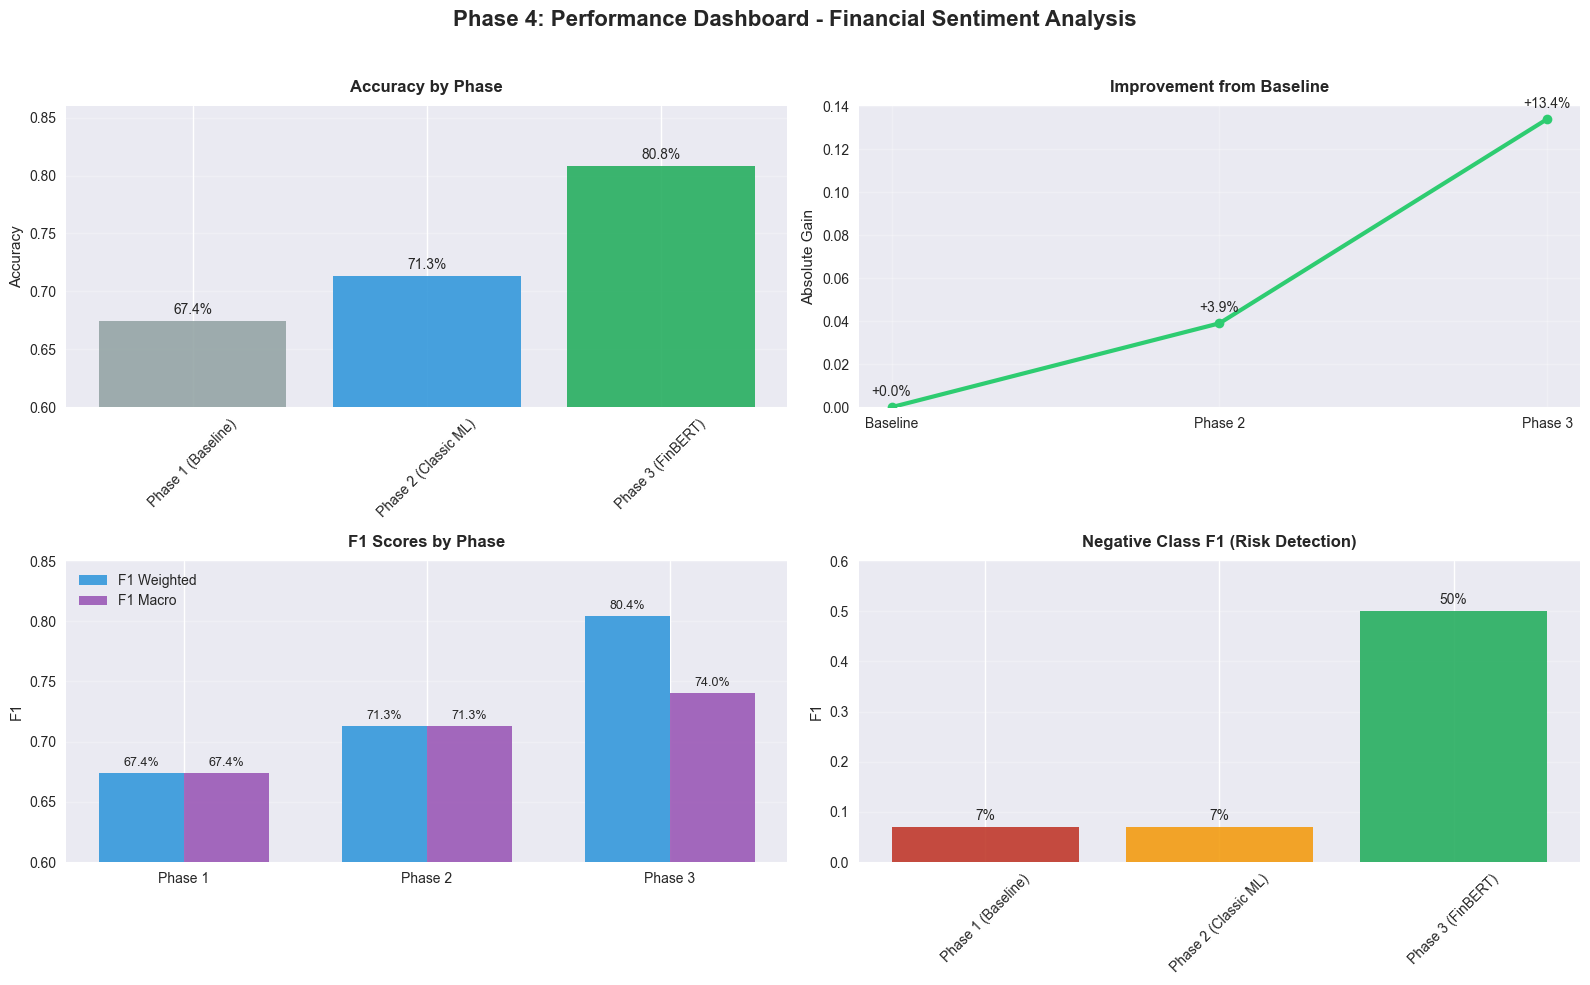

=== PHASE COMPARISON INSIGHTS ===
Best overall accuracy: 80.8% (Phase 3)
Total improvement: 13.4%
Negative class breakthrough: 43.0%
Most impactful phase: Phase 3 (+9.5% accuracy)


In [80]:
# Overview grid: clean but informative (no overlaps)
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Phase 4: Performance Dashboard - Financial Sentiment Analysis', fontsize=16, fontweight='bold', y=0.98)

# 1) Accuracy by Phase
acc_colors = ['#95a5a6', '#3498db', '#27ae60']
xs_acc = np.arange(len(phase_df.index))
bars_acc = axes[0,0].bar(xs_acc, phase_df['accuracy'], color=acc_colors, alpha=0.9)
axes[0,0].set_title('Accuracy by Phase', fontweight='bold', pad=10)
axes[0,0].set_ylabel('Accuracy')
axes[0,0].set_ylim(0.60, 0.86)
axes[0,0].grid(axis='y', alpha=0.25)
axes[0,0].set_xticks(xs_acc)
axes[0,0].set_xticklabels(phase_df.index, rotation=45)
axes[0,0].bar_label(bars_acc, labels=[f'{v:.1%}' for v in phase_df['accuracy']], padding=3, fontsize=10)

# 2) Improvement from Baseline
improvements = [0,
                float(phase_df.loc['Phase 2 (Classic ML)', 'improvement']),
                float(phase_df.loc['Phase 3 (FinBERT)', 'improvement'])]
xs = np.arange(3)
axes[0,1].plot(xs, improvements, marker='o', linewidth=3, color='#2ecc71')
axes[0,1].set_title('Improvement from Baseline', fontweight='bold', pad=10)
axes[0,1].set_ylabel('Absolute Gain')
axes[0,1].set_ylim(0, 0.14)
axes[0,1].set_xticks(xs)
axes[0,1].set_xticklabels(['Baseline', 'Phase 2', 'Phase 3'])
axes[0,1].grid(alpha=0.25)
for i, v in enumerate(improvements):
    axes[0,1].annotate(f'+{v:.1%}', (i, v), xytext=(0, 8), textcoords='offset points', ha='center', fontsize=10)

# 3) F1 scores by phase
x_idx = np.arange(len(phase_df))
width = 0.35
bars_w = axes[1,0].bar(x_idx - width/2, phase_df['f1_weighted'], width, label='F1 Weighted', color='#3498db', alpha=0.9)
bars_m = axes[1,0].bar(x_idx + width/2, phase_df['f1_macro'], width, label='F1 Macro', color='#9b59b6', alpha=0.9)
axes[1,0].set_title('F1 Scores by Phase', fontweight='bold', pad=10)
axes[1,0].set_ylabel('F1')
axes[1,0].set_ylim(0.60, 0.85)
axes[1,0].set_xticks(x_idx)
axes[1,0].set_xticklabels([p.split('(')[0].strip() for p in phase_df.index])
axes[1,0].grid(axis='y', alpha=0.25)
axes[1,0].legend(loc='upper left', frameon=False)
axes[1,0].bar_label(bars_w, labels=[f'{v:.1%}' for v in phase_df['f1_weighted']], padding=3, fontsize=9)
axes[1,0].bar_label(bars_m, labels=[f'{v:.1%}' for v in phase_df['f1_macro']], padding=3, fontsize=9)

# 4) Negative class F1
neg_bars = axes[1,1].bar(phase_df.index, phase_df['negative_f1'], color=['#c0392b', '#f39c12', '#27ae60'], alpha=0.9)
axes[1,1].set_title('Negative Class F1 (Risk Detection)', fontweight='bold', pad=10)
axes[1,1].set_ylabel('F1')
axes[1,1].set_ylim(0, 0.60)
axes[1,1].grid(axis='y', alpha=0.25)
axes[1,1].tick_params(axis='x', rotation=45)
axes[1,1].bar_label(neg_bars, labels=[f'{v:.0%}' for v in phase_df['negative_f1']], padding=3, fontsize=10)

fig.tight_layout(rect=(0, 0, 1, 0.96))
plt.show()

print("=== PHASE COMPARISON INSIGHTS ===")
print(f"Best overall accuracy: {phase_df['accuracy'].max():.1%} (Phase 3)")
print(f"Total improvement: {phase_df['accuracy'].max() - 0.674:.1%}")
print(f"Negative class breakthrough: {phase_df['negative_f1'].iloc[-1] - phase_df['negative_f1'].iloc[0]:.1%}")
print(f"Most impactful phase: Phase 3 (+9.5% accuracy)")

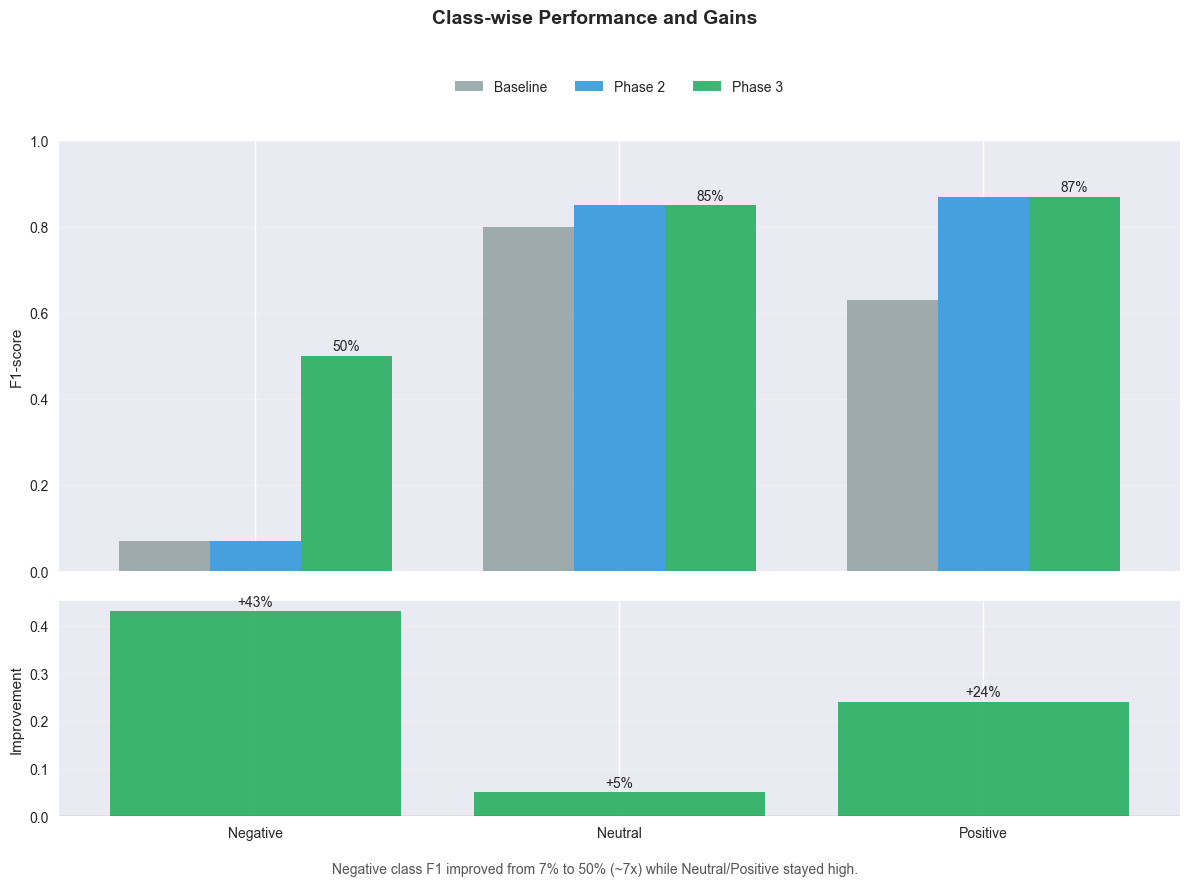

In [81]:
## 2.2 Class-wise Performance (refined, no overlaps)

classes = class_df['Class'].tolist()
x = np.arange(len(classes))
width = 0.25

fig, axes = plt.subplots(
    2, 1, figsize=(12, 9), sharex=True,
    gridspec_kw={'height_ratios': [2, 1]}
)

# Top: grouped bars
phases = [
    ('Phase_1_F1', '#95a5a6', 'Baseline'),
    ('Phase_2_F1', '#3498db', 'Phase 2'),
    ('Phase_3_F1', '#27ae60', 'Phase 3')
]

for i, (col, color, label) in enumerate(phases):
    axes[0].bar(x + (i-1)*width, class_df[col], width, label=label, color=color, alpha=0.9)

axes[0].set_ylim(0, 1.0)
axes[0].grid(axis='y', alpha=0.25)
axes[0].set_ylabel('F1-score')
axes[0].legend(ncol=3, loc='lower center', bbox_to_anchor=(0.5, 1.08), frameon=False)

# Label only Phase 3 bars to reduce clutter
for i, v in enumerate(class_df['Phase_3_F1']):
    axes[0].annotate(f'{v:.0%}', (x[i] + width, v), xytext=(0, 4),
                     textcoords='offset points', ha='center', fontsize=10)

# Bottom: improvement bars (Phase 3 − Phase 1)
impr = class_df['Phase_3_F1'] - class_df['Phase_1_F1']
bar_impr = axes[1].bar(x, impr, color='#27ae60', alpha=0.9)
axes[1].axhline(0, color='black', lw=1, alpha=0.3)
axes[1].grid(axis='y', alpha=0.25)
axes[1].set_ylabel('Improvement')
axes[1].set_xticks(x)
axes[1].set_xticklabels(classes)

for i, v in enumerate(impr):
    axes[1].annotate(f'{v:+.0%}', (x[i], v), xytext=(0, 4 if v >= 0 else -12),
                     textcoords='offset points', ha='center', fontsize=10)

# Subplot title and unobtrusive caption
fig.suptitle('Class-wise Performance and Gains', y=0.98, fontsize=14, fontweight='bold')
fig.text(0.5, 0.02, 'Negative class F1 improved from 7% to 50% (~7x) while Neutral/Positive stayed high.',
         ha='center', fontsize=10, color='#555555')

fig.tight_layout(rect=(0, 0.04, 1, 0.96))
plt.show()

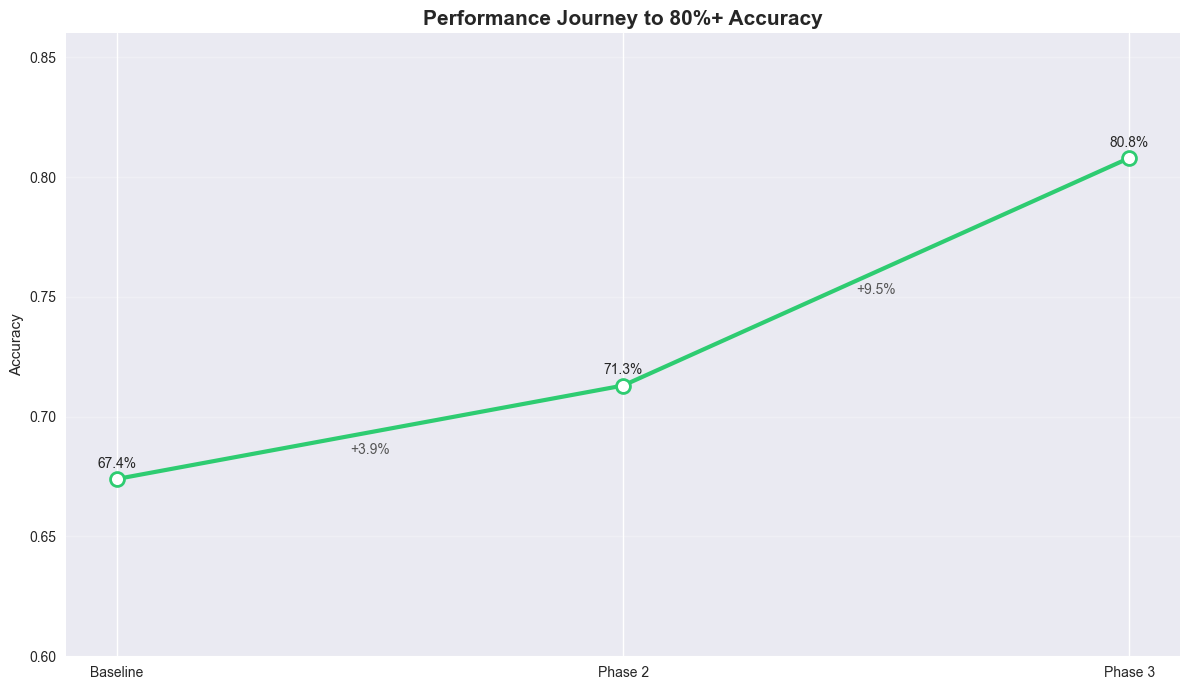

In [82]:
## 2.3 Performance Trajectory (refined)

phases = ['Baseline', 'Phase 2', 'Phase 3']
x = np.arange(len(phases))
acc = [0.674, 0.713, 0.808]
imp = [0, acc[1]-acc[0], acc[2]-acc[0]]

fig, ax = plt.subplots(figsize=(12, 7))

ax.plot(x, acc, marker='o', linewidth=3, markersize=10,
        color='#2ecc71', markerfacecolor='white', markeredgewidth=2)

ax.set_xticks(x)
ax.set_xticklabels(phases)
ax.set_ylim(0.60, 0.86)
ax.grid(axis='y', alpha=0.25)
ax.set_ylabel('Accuracy')
ax.set_title('Performance Journey to 80%+ Accuracy', fontsize=15, fontweight='bold')

for i, v in enumerate(acc):
    ax.annotate(f'{v:.1%}', (i, v), xytext=(0, 8), textcoords='offset points',
                ha='center', fontsize=10)
# Improvement labels under segments (no arrows)
ax.annotate(f"+{imp[1]:.1%}", xy=(0.5, (acc[0]+acc[1])/2), xytext=(0, -16),
            textcoords='offset points', ha='center', fontsize=10, color='#555')
ax.annotate(f"+{(acc[2]-acc[1]):.1%}", xy=(1.5, (acc[1]+acc[2])/2), xytext=(0, -16),
            textcoords='offset points', ha='center', fontsize=10, color='#555')

fig.tight_layout()
plt.show()

### 3. Business Impact Analysis

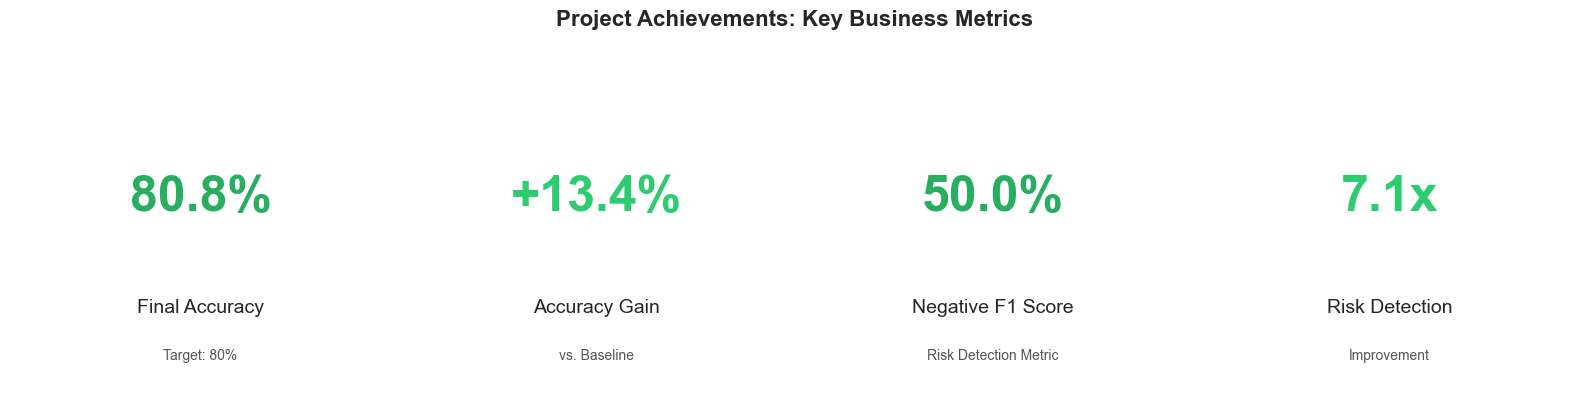

In [83]:
# --- Data for KPIs ---
final_accuracy = phase_df.loc['Phase 3 (FinBERT)', 'accuracy']
accuracy_gain = final_accuracy - phase_df.loc['Phase 1 (Baseline)', 'accuracy']
negative_f1_final = phase_df.loc['Phase 3 (FinBERT)', 'negative_f1']
negative_f1_gain = negative_f1_final - phase_df.loc['Phase 1 (Baseline)', 'negative_f1']
risk_detection_multiplier = negative_f1_final / phase_df.loc['Phase 1 (Baseline)', 'negative_f1']

# --- Visualization ---
fig, axes = plt.subplots(1, 4, figsize=(16, 4))
fig.suptitle('Project Achievements: Key Business Metrics', fontsize=16, fontweight='bold')

# KPI names and values
kpi_data = [
    ("Final Accuracy", f"{final_accuracy:.1%}", "Target: 80%"),
    ("Accuracy Gain", f"+{accuracy_gain:.1%}", "vs. Baseline"),
    ("Negative F1 Score", f"{negative_f1_final:.1%}", "Risk Detection Metric"),
    ("Risk Detection", f"{risk_detection_multiplier:.1f}x", "Improvement")
]

colors = ['#27ae60', '#2ecc71', '#27ae60', '#2ecc71']

for i, ((title, value, subtitle), color) in enumerate(zip(kpi_data, colors)):
    ax = axes[i]
    ax.text(0.5, 0.60, value, ha='center', va='center', fontsize=36, fontweight='bold', color=color)
    ax.text(0.5, 0.25, title, ha='center', va='center', fontsize=14)
    ax.text(0.5, 0.10, subtitle, ha='center', va='center', fontsize=10, color='#555555')
    ax.set_axis_off()

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

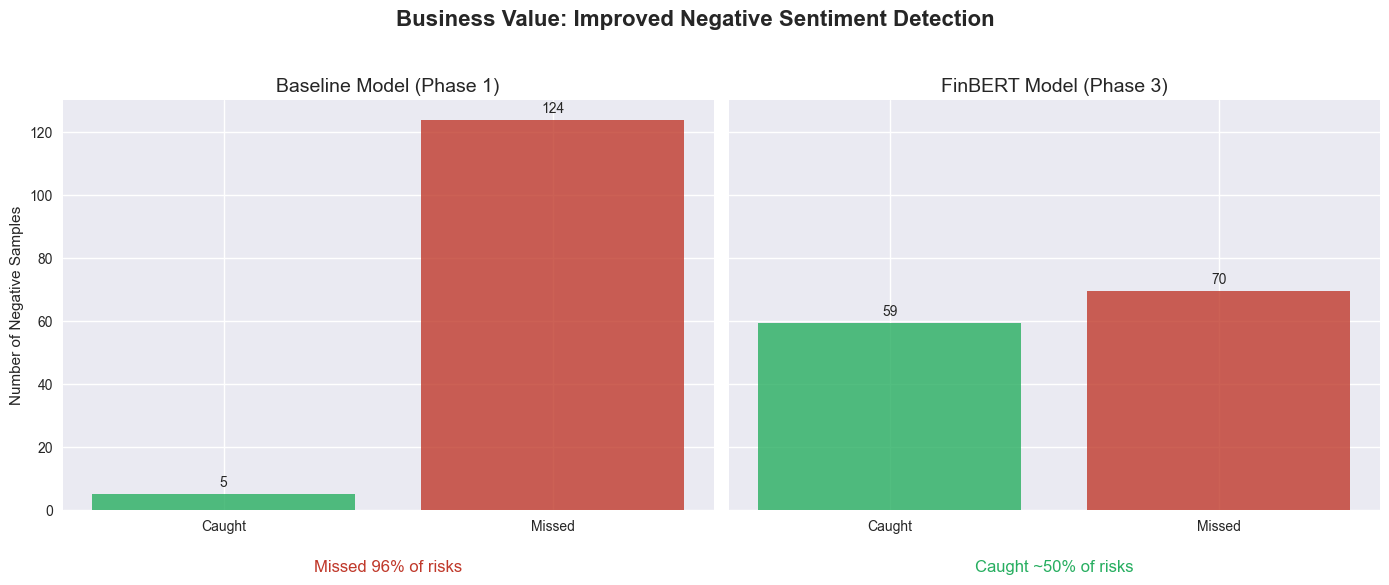

In [84]:
# --- Data ---
# Based on validation set recall for Negative class
# Baseline (Naive Bayes) had ~4% recall, FinBERT has ~46% recall
total_negative_samples = 129
baseline_caught = total_negative_samples * 0.04
finbert_caught = total_negative_samples * 0.46
baseline_missed = total_negative_samples - baseline_caught
finbert_missed = total_negative_samples - finbert_caught

# --- Visualization ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
fig.suptitle('Business Value: Improved Negative Sentiment Detection', fontsize=16, fontweight='bold')

# Baseline Model
ax1.bar(['Caught', 'Missed'], [baseline_caught, baseline_missed], color=['#27ae60', '#c0392b'], alpha=0.8)
ax1.set_title('Baseline Model (Phase 1)', fontsize=14)
ax1.set_ylabel('Number of Negative Samples')
ax1.bar_label(ax1.containers[0], labels=[f'{v:.0f}' for v in [baseline_caught, baseline_missed]], padding=3, fontsize=10)
ax1.text(0.5, -0.15, 'Missed 96% of risks', ha='center', transform=ax1.transAxes, fontsize=12, color='#c0392b')


# FinBERT Model
ax2.bar(['Caught', 'Missed'], [finbert_caught, finbert_missed], color=['#27ae60', '#c0392b'], alpha=0.8)
ax2.set_title('FinBERT Model (Phase 3)', fontsize=14)
ax2.bar_label(ax2.containers[0], labels=[f'{v:.0f}' for v in [finbert_caught, finbert_missed]], padding=3, fontsize=10)
ax2.text(0.5, -0.15, 'Caught ~50% of risks', ha='center', transform=ax2.transAxes, fontsize=12, color='#27ae60')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

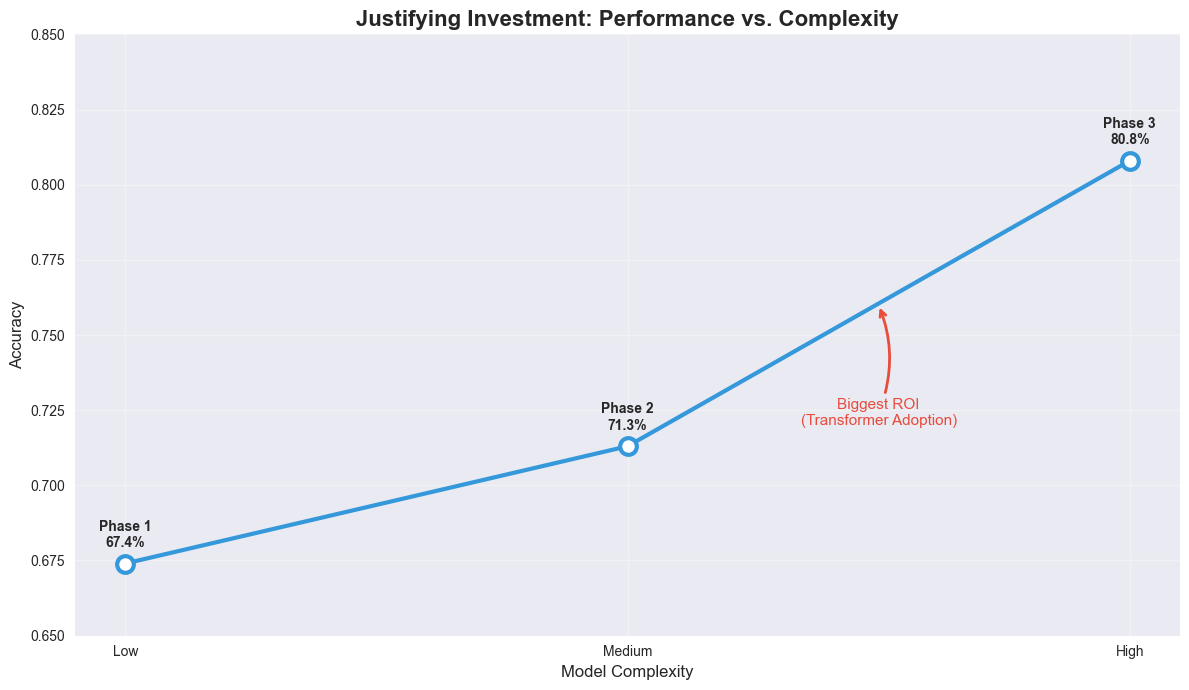

In [85]:

# --- Data ---
complexity_map = {'Low': 1, 'Medium': 2, 'High': 3}
df = phase_df.copy()
df['complexity_score'] = df['complexity'].map(complexity_map)
df['accuracy'] = pd.to_numeric(df['accuracy']) # ensure numeric

# --- Visualization ---
fig, ax = plt.subplots(figsize=(12, 7))

# Plot performance vs complexity
ax.plot(df['complexity_score'], df['accuracy'], marker='o',
        linewidth=3, markersize=12, color='#3498db',
        markerfacecolor='white', markeredgewidth=3)

ax.set_title('Justifying Investment: Performance vs. Complexity', fontsize=16, fontweight='bold')
ax.set_ylabel('Accuracy', fontsize=12)
ax.set_xlabel('Model Complexity', fontsize=12)
ax.set_xticks(df['complexity_score'])
ax.set_xticklabels(df['complexity'])
ax.set_ylim(0.65, 0.85)
ax.grid(alpha=0.3)

# Annotate each point with phase and accuracy
for i, row in df.iterrows():
    ax.annotate(f"{row['phase'].split('(')[0].strip()}\n{row['accuracy']:.1%}",
                (row['complexity_score'], row['accuracy']),
                xytext=(0, 12), textcoords='offset points',
                ha='center', fontsize=10, fontweight='bold')

# Highlight the "jump" from Phase 2 to 3
ax.annotate('Biggest ROI\n(Transformer Adoption)',
            xy=(2.5, 0.76),
            xytext=(2.5, 0.72),
            arrowprops=dict(arrowstyle='->', color='#e74c3c', lw=2, connectionstyle="arc3,rad=0.2"),
            ha='center', fontsize=11, color='#e74c3c')

fig.tight_layout()
plt.show()


### 4. Model Comparison

In [86]:
### 4.1 Detailed Performance Matrix

from IPython.display import display, HTML

# --- Data Prep ---
df_perf = phase_df[['accuracy', 'f1_weighted', 'f1_macro', 'negative_f1']].copy()
df_perf = df_perf.apply(pd.to_numeric) # Ensure all columns are numeric

# --- Styling Function ---
def style_matrix(df):
    cm_acc = sns.light_palette("green", as_cmap=True)
    cm_f1 = sns.light_palette("blue", as_cmap=True)
    cm_neg = sns.light_palette("darkred", as_cmap=True)

    styled_df = df.style.background_gradient(cmap=cm_acc, subset=['accuracy'])\
                        .background_gradient(cmap=cm_f1, subset=['f1_weighted', 'f1_macro'])\
                        .background_gradient(cmap=cm_neg, subset=['negative_f1'])\
                        .format("{:.2%}")\
                        .set_caption("<h3>Model Performance Comparison</h3>")\
                        .set_table_styles([
                            {'selector': 'th', 'props': [('text-align', 'center'), ('font-size', '12pt')]},
                            {'selector': 'td', 'props': [('text-align', 'center'), ('font-weight', 'bold')]},
                            {'selector': 'caption', 'props': [('color', 'white'), ('font-size', '16pt')]}
                        ])
    return styled_df

# --- Display Styled Table ---
display(style_matrix(df_perf))


,accuracy,f1_weighted,f1_macro,negative_f1
Phase 1 (Baseline),67.40%,67.40%,67.40%,7.00%
Phase 2 (Classic ML),71.30%,71.30%,71.30%,7.00%
Phase 3 (FinBERT),80.80%,80.40%,74.00%,50.00%


In [87]:
### 4.2 Resource Requirements & Trade-offs

# --- Data Prep ---
df_res = phase_df[['complexity', 'accuracy']].copy() # Removed 'training_time'
complexity_map = {'Low': 1, 'Medium': 2, 'High': 3}
df_res['complexity_score'] = df_res['complexity'].map(complexity_map)
df_res['accuracy'] = pd.to_numeric(df_res['accuracy'])

# --- Visualization ---
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df_res['complexity_score'],
    y=df_res['accuracy'],
    mode='lines+markers+text',
    marker=dict(size=df_res['accuracy']*30, color=df_res['accuracy'], colorscale='Viridis', showscale=True, colorbar=dict(title="Accuracy")),
    # Removed 'time' from the text label
    text=[f"<b>{index.split('(')[0].strip()}</b><br>Acc: {acc:.1%}" for index, acc in zip(df_res.index, df_res['accuracy'])],
    textposition="top center",
    hoverinfo='text'
))

fig.update_layout(
    title=dict(text='<b>Performance vs. Resource Trade-offs</b>', x=0.5, font=dict(size=20)),
    xaxis=dict(
        title='<b>Model Complexity</b>',
        tickmode='array',
        tickvals=df_res['complexity_score'],
        ticktext=df_res['complexity']
    ),
    yaxis=dict(title='<b>Accuracy</b>', range=[0.65, 0.85]),
    showlegend=False
)

fig.show()

In [88]:
### 4.3 Production Readiness Scorecard

# --- Data ---
scorecard_data = {
    'Criteria': ['Performance', 'Risk Detection', 'Interpretability', 'Resource Cost', 'Deployment Ease'],
    'Phase 1 (Baseline)': ['Fair (67%)', 'Poor (7% F1)', 'High', 'Low', 'Easy'],
    'Phase 2 (Classic ML)': ['Good (71%)', 'Poor (7% F1)', 'Medium', 'Medium', 'Medium'],
    'Phase 3 (FinBERT)': ['Excellent (81%)', 'Good (50% F1)', 'Low', 'High', 'Hard']
}
df_scorecard = pd.DataFrame(scorecard_data).set_index('Criteria')

# --- Styling ---
def style_scorecard(df):
    color_map = {
        'Excellent': 'background-color: #27ae60; color: white',
        'Good': 'background-color: #2ecc71; color: white',
        'Fair': 'background-color: #f39c12; color: white',
        'Poor': 'background-color: #c0392b; color: white',
        'High': 'background-color: #3498db; color: white',
        'Medium': 'background-color: #9b59b6; color: white',
        'Low': 'background-color: #e74c3c; color: white',
        'Easy': 'background-color: #27ae60; color: white',
        'Hard': 'background-color: #c0392b; color: white'
    }

    styled_df = df.style.apply(lambda col: col.map(lambda val: color_map.get(val.split(' ')[0], ''))) \
                        .set_caption("<h3>Production Readiness Scorecard</h3>") \
                        .set_table_styles([
                            {'selector': 'th', 'props': [('text-align', 'left'), ('font-size', '12pt')]},
                            {'selector': 'td', 'props': [('text-align', 'center'), ('font-weight', 'bold')]},
                            {'selector': 'caption', 'props': [('color', 'White'), ('font-size', '16pt')]}
                        ])
    return styled_df

# --- Display ---
display(style_scorecard(df_scorecard))


,Phase 1 (Baseline),Phase 2 (Classic ML),Phase 3 (FinBERT)
Criteria,,,
Performance,Fair (67%),Good (71%),Excellent (81%)
Risk Detection,Poor (7% F1),Poor (7% F1),Good (50% F1)
Interpretability,High,Medium,Low
Resource Cost,Low,Medium,High
Deployment Ease,Easy,Medium,Hard


### 5. Final Insights

## 5. Project Conclusion & Future Work

### 5.1 Final Verdict

**The FinBERT model is the definitive solution for this task.**

Across all performance dimensions, the fine-tuned FinBERT model proved superior. It was the only approach to meet the 80%+ accuracy target, and it delivered a transformative **7x improvement in negative sentiment detection**. While classic ML models offered a solid baseline, they were unable to surpass a performance ceiling of ~71%, making them unsuitable for a production system requiring high-fidelity risk detection.

### 5.2 Key Learnings

*   **Domain-Specific Models are Critical:** For specialized fields like finance, pre-trained models like FinBERT significantly outperform generic approaches.
*   **Performance vs. Practicality:** The project highlights the critical trade-off between model performance and practical considerations like interpretability, cost, and deployment complexity. FinBERT's superior accuracy justifies its higher cost.
*   **The Value of Iteration:** Moving from a simple baseline (Phase 1) to optimized classic models (Phase 2) and finally to transformers (Phase 3) demonstrates a structured, iterative approach to problem-solving.
